<a href="https://colab.research.google.com/github/jiyun126/-/blob/main/%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D_5%EC%A3%BC%EC%B0%A8_%EC%84%A0%ED%98%95%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 선형방정식(Determined linear equation)


- 선형 연립방정식 (two equations, two unknowns)
$$
\begin{align*}
x_{1} - 3x_{2} &= -3\\
2x_{1} + x_{2} &= 8
\end{align*}
$$

- 벡터 형식 ; $Ax = b$,
<br>
$$A =
\begin{bmatrix}
1 & -3 \\
2 & 1
\end{bmatrix}
, \quad
x =
\begin{bmatrix}
x_{1} \\
x_{2}
\end{bmatrix}
, \quad
b =
\begin{bmatrix}
-3 \\
8
\end{bmatrix}
$$
<br>
- 역행렬
$$
\begin{align*}
Ax &= b \\
A^{-1}Ax &= A^{-1}b \\
x &= A^{-1}b
\end{align*}
$$
<br>

In [ ]:
import numpy as np

A = np.array([[1, -3], [2, 1]])
print(A)

[[ 1 -3]
 [ 2  1]]


In [ ]:
b = np.array([[-3], [8]])
print(b)

[[-3]
 [ 8]]


In [ ]:
A = np.asmatrix(A)   # Data A를 행렬로 변환
b = np.asmatrix(b)   # Data b를 행렬로 변환

In [ ]:
x = A.I*b
print(x)

[[3.]
 [2.]]


# 학습 데이터

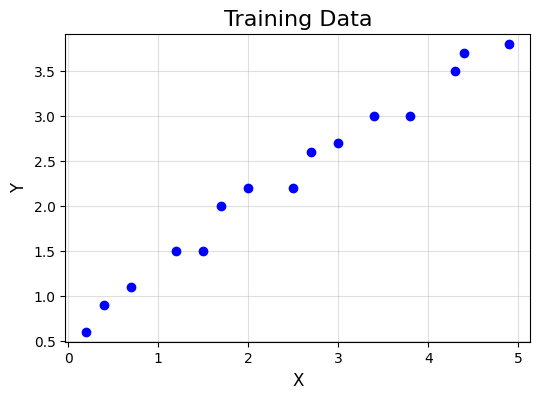

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# column vector : input x, output y
x = np.array([0.2, 0.4, 0.7, 1.2, 1.5, 1.7, 2.0, 2.5, 2.7, 3.0, 3.4, 3.8, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.6, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.2, 2.6, 2.7, 3.0, 3.0, 3.5, 3.7, 3.8]).reshape(-1, 1)

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')
plt.title('Training Data', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.4)
plt.show()

# 학습 데이터(CSV file)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

x = pd.read_csv('/content/drive/MyDrive/Machine Learning실습/lr_data.csv', usecols=['x']).values
y = pd.read_csv('/content/drive/MyDrive/Machine Learning실습/lr_data.csv', usecols=['y']).values
plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo')
plt.title('Training Data', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.4)
plt.show()

# 최소제곱법

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# column vector : input x, output y
x = np.array([0.2, 0.4, 0.7, 1.2, 1.5, 1.7, 2.0, 2.5, 2.7, 3.0, 3.4, 3.8, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.6, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.2, 2.6, 2.7, 3.0, 3.0, 3.5, 3.7, 3.8]).reshape(-1, 1)

# m = y.shape[0]
# np.hstack([np.ones([m,1]), x])
A = np.hstack([x**0, x])
A = np.asmatrix(A)
#print('A :\n', A)

w = (A.T*A).I*A.T*y
print('parameter w :\n', w)


parameter w :
 [[0.64805086]
 [0.66973398]]


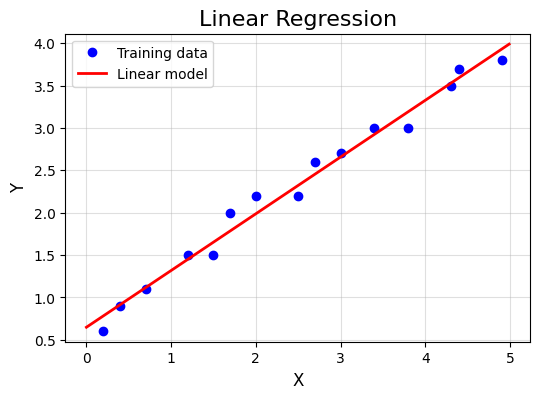

In [ ]:
# 학습 데이터
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

# 선형모델 plotting (최소제곱법)
xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp
#print(yp)
plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.axis('equal')
plt.grid(alpha = 0.4)
plt.show()

# 경사하강법(Gradient Descent)

[0.68106405] [0.61159802]


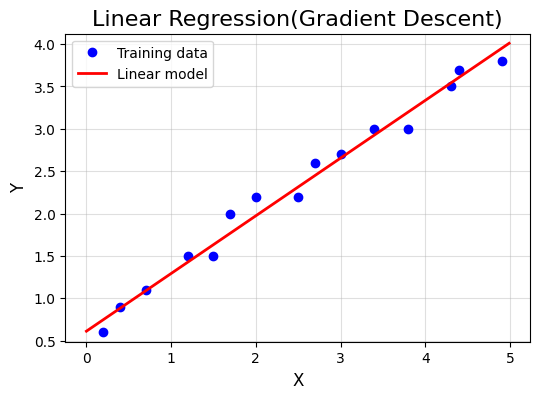

In [ ]:
# Gradient Descent
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.2, 0.4, 0.7, 1.2, 1.5, 1.7, 2.0, 2.5, 2.7, 3.0, 3.4, 3.8, 4.3, 4.4, 4.9]).reshape(-1, 1)
y = np.array([0.6, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.2, 2.6, 2.7, 3.0, 3.0, 3.5, 3.7, 3.8]).reshape(-1, 1)

# m = y.shape[0]
# np.hstack([np.ones([m,1]), x])
A = np.hstack([x**0, x])  # data x의 앞에 1을 horizontal 방향으로 추가
A = np.asmatrix(A)
# print('A :\n', A)

w1 = 0       # 기울기
w0 = 0       # 절편

lrate = 0.01  # 학습률(Learning rate) --> α
epochs = 1000  # 반복 횟수

n = float(len(x)) # 입력 데이터의 개수

# 경사 하강법
for i in range(epochs):
    y_pred = w1*x + w0  		          	# 선형 회귀 예측값
    dw1 = (1/n) * sum(x * (y_pred-y)) 	# 넘파이 배열간의 산술 계산은 요소별로 적용
    dw0 = (1/n) * sum(y_pred-y)  	      # sum()은 모든 요소들의 합을 계산하는 내장 함수
    w1 = w1 - lrate * dw1           		# 기울기 update
    w0 = w0 - lrate * dw0  		          # 절편 update
print (w1, w0)

# 학습 데이터 그래프
plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

xp = np.arange(0, 5, 0.01).reshape(-1, 1)
y_pred = w1*xp + w0  # 예측값을 만든다.
#print(y_pred)
plt.plot(xp, y_pred, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.axis('equal')
plt.grid(alpha = 0.4)
plt.show()

<br>

# Gradient Descent (행렬의 미분)

<br>

$$arg\min_{\omega} ~ \lVert \hat y - y \rVert_2^2  =  arg\min_{\omega} ~ \lVert A\omega - y \rVert_2^2$$

<br>

$$
\begin{align*}
J &= (A\omega-y)^T(A\omega-y) = (\omega^TA^T-y^T)(A\omega-y) \\
&= \omega^TA^TA\omega - \omega^TA^Ty - y^TA\omega + y^Ty \\\\
\nabla J &= A^TA\omega + A^TA\omega - A^Ty - A^Ty = 2(A^TA\omega - A^Ty)
\end{align*}
$$     

<br>
$$
\omega \leftarrow \omega - \alpha \nabla J
$$


In [ ]:
# Gradient Descent2
import numpy as np
import matplotlib.pyplot as plt

# column vector x,y [input, output]
x = np.array([0.2, 0.4, 0.7, 1.2, 1.5, 1.7, 2.0, 2.5, 2.7, 3.0, 3.4, 3.8, 4.3, 4.4, 4.9]).reshape(-1, 1)  # 15개 data
y = np.array([0.6, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.2, 2.6, 2.7, 3.0, 3.0, 3.5, 3.7, 3.8]).reshape(-1, 1)

m = y.shape[0]
A = np.hstack([x**0, x]) # np.hstack([np.ones([m,1]), x]),    data x의 앞에 1을 horizontal 방향으로 추가
A = np.asmatrix(A)       # A를 행렬로 변환

w = np.random.randn(2,1)    # initial parameter setting randn(행개수,열개수)
w = np.asmatrix(w)

alpha = 0.001                # Learning rate

for _ in range(1000):         # epoch
    dJ = 2*(A.T*A*w - A.T*y)  # Partial derivative of parameter
    w = w - alpha*dJ          # Gradient Descent

print (w)

plt.figure(figsize = (6, 4))
plt.title('Linear Regression(Gradient Descent)', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "data")

xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = "Linear model")
plt.legend()
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

<br>

# CVXPY 함수

- CVXPY : A convex optimization solver
  https://www.cvxpy.org/

<br>
$$
\begin{array}{Icr}\begin{align*}
\max_{x} \quad & 3x_1 + {3 \over 2}x_2 \\
\text{subject to} \quad
& -1 \leq x_1 \leq 2 \\
& \quad 0 \leq x_2 \leq 3
\end{align*}\end{array}
\quad\implies\quad
\begin{array}{I}
\quad \max_{x} \quad & \begin{bmatrix} 3 \\ 3 / 2 \end{bmatrix}^T \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \\
\text{subject to} \quad
& \begin{bmatrix} -1 \\ 0 \end{bmatrix} \leq \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} \leq \begin{bmatrix} 2 \\ 3 \\ \end{bmatrix}
\end{array}
$$

<br>

In [ ]:
# CVXPY 함수 예제

import numpy as np
import cvxpy as cvx

f = np.array([[3], [3/2]])
lb = np.array([[-1], [0]])
ub = np.array([[2], [3]])

x = cvx.Variable([2,1])  # decision variable x, Variable : V는 대문자

obj = cvx.Maximize(f.T@x)  # objective function, Maximize : M는 대문자
constraints = [lb <= x, x <= ub]  # 제약조건

prob = cvx.Problem(obj, constraints) # problem define
result = prob.solve()   # find an optimal solution

print(x.value)   # maximal value = [[2], [3]]
print(result)

<br>

# Convex function일 때 CVXPY 함수 사용

- CVXPY : A convex optimization solver
  https://www.cvxpy.org/


## 1) L2 Norm
<br>
$$arg\min_{\omega} ~ \lVert \hat y - y \rVert_2  =  arg\min_{\omega} ~ \lVert A\omega - y \rVert_2$$
<br>

Omega:
 [[0.64805086]
 [0.66973398]]


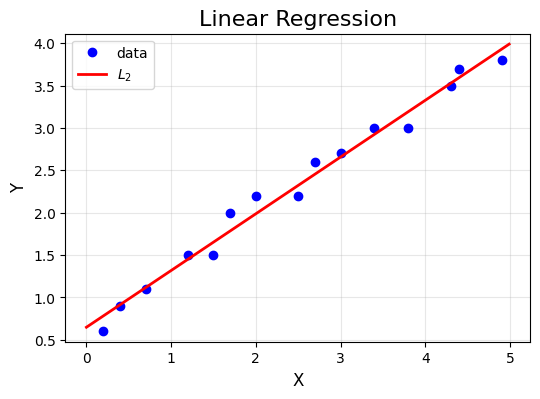

In [ ]:
import cvxpy as cvx

w = cvx.Variable([2, 1])
opt_cost_l2 = cvx.Minimize(cvx.norm(A@w - y, 2))  # L2 norm,  ∥Aω−y∥2
cvx.Problem(opt_cost_l2,[]).solve()

print('Omega:\n', w.value)


# to plot straight lines (fitted lines)
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "data")

xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w.value[0,0] + w.value[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = '$L_2$')
plt.legend()
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()


## 2) L1 Norm

$$  arg\min_{\omega} ~ \lVert \hat y - y \rVert_1  =  arg\min_{\omega} ~ \lVert A\omega - y \rVert_1  $$
<br>

Omega:
 [[0.62307692]
 [0.69230768]]


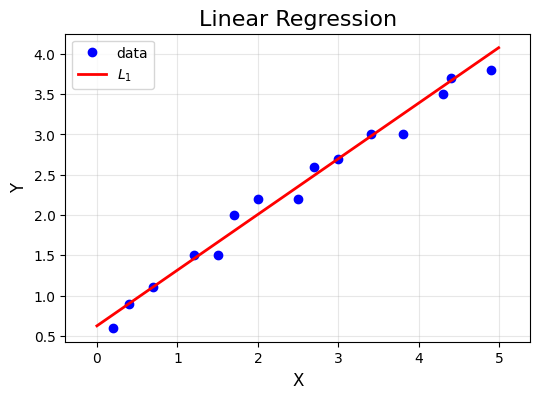

In [ ]:
import cvxpy as cvx

w = cvx.Variable([2, 1])
opt_cost_l1 = cvx.Minimize(cvx.norm(A@w - y, 1)) # L1 norm
cvx.Problem(opt_cost_l1,[]).solve()

print('Omega:\n', w.value)


# to plot straight lines (fitted lines)
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "data")

xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w.value[0,0] + w.value[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = '$L_1$')
plt.legend()
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()



#  Outliers가 존재할 때의 L2 norm과 L1 norm 비교



## 1) Outliers data 추가

In [ ]:
# column vector x,y [input, output]
x = np.array([0.2, 0.4, 0.7, 1.2, 1.5, 1.7, 2.0, 2.5, 2.7, 3.0, 3.4, 3.8, 4.3, 4.4, 4.9]).reshape(-1, 1)  # 15개 data
y = np.array([0.6, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.2, 2.6, 2.7, 3.0, 3.0, 3.5, 3.7, 3.8]).reshape(-1, 1)

# outliers 데이터 추가
x = np.vstack([x, np.array([0.5, 3.5]).reshape(-1, 1)])
y = np.vstack([y, np.array([4.0, 0.8]).reshape(-1, 1)])

A = np.hstack([x**0, x])
A = np.asmatrix(A)
# A.shape
print(A)


In [ ]:
# to plot straight lines (fitted lines)
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "data")

## 2) L2 Norm

In [ ]:
import cvxpy as cvx

w = cvx.Variable([2, 1])
opt_cost_l2 = cvx.Minimize(cvx.norm(A@w - y, 2))  # L2 norm
cvx.Problem(opt_cost_l2,[]).solve()

print('Omega:\n', w.value)


# to plot straight lines (fitted lines)
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "data")

xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w.value[0,0] + w.value[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = '$L_2$ norm')
plt.legend()
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

## 3) L1 Norm

Omega:
 [[0.63333333]
 [0.66666667]]


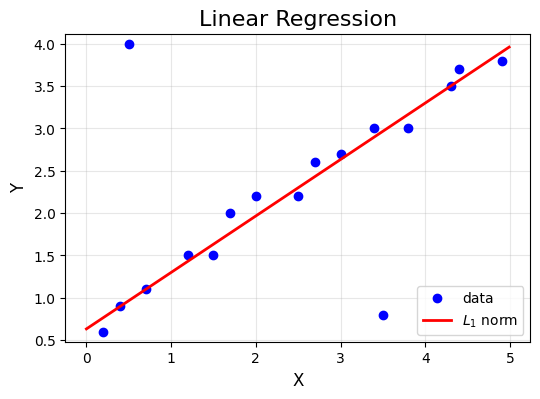

In [ ]:
import cvxpy as cvx

w = cvx.Variable([2, 1])
opt_cost_l1 = cvx.Minimize(cvx.norm(A@w - y, 1)) # L1 norm
cvx.Problem(opt_cost_l1,[]).solve()

print('Omega:\n', w.value)


# to plot straight lines (fitted lines)
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "data")

xp = np.arange(0, 5, 0.01).reshape(-1, 1)
yp = w.value[0,0] + w.value[1,0]*xp

plt.plot(xp, yp, 'r', linewidth = 2, label = '$L_1$ norm')
plt.legend()
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()

<br>

# Scikit-Learn : Linear Regression

<br>

- Simple and efficient tools for data mining and data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and Matplotlib
- Open source
- https://scikit-learn.org/stable/index.html#

<br>

In [ ]:
from sklearn import linear_model

# column vector x,y [input, output]
x = np.array([0.2, 0.4, 0.7, 1.2, 1.5, 1.7, 2.0, 2.5, 2.7, 3.0, 3.4, 3.8, 4.3, 4.4, 4.9]).reshape(-1, 1)  # 15개 data
y = np.array([0.6, 0.9, 1.1, 1.5, 1.5, 2.0, 2.2, 2.2, 2.6, 2.7, 3.0, 3.0, 3.5, 3.7, 3.8]).reshape(-1, 1)

In [ ]:
reg = linear_model.LinearRegression()
reg.fit(x, y)       # 학습

LinearRegression()

In [ ]:
reg.coef_

array([[0.66973398]])

In [ ]:
reg.intercept_

array([0.64805086])

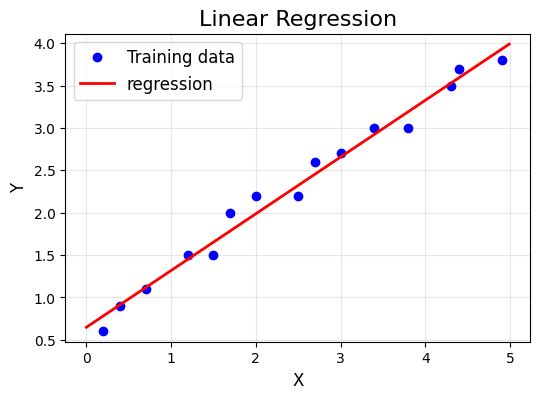

In [ ]:
# Training data
plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(x, y, 'bo', label = "Training data")

# to plot a straight line (fitted line)
plt.plot(xp, reg.predict(xp), 'r', linewidth = 2, label = "regression")
plt.legend(fontsize = 12)
plt.axis('equal')
plt.grid(alpha = 0.3)
plt.show()



# Multivariate Linear Regression
<br>

## Linear Regression for Multivariate Data

<br>
$$ \hat{y} = \omega_0 + \omega_{1}x_1 + \omega_{2}x_2  $$
<br>
$$\phi \left(x^{(i)}\right) = \begin{bmatrix}1\\x^{(i)}_{1}\\x^{(i)}_{2} \end{bmatrix}$$
<br>

In [ ]:
# for 3D plot
from mpl_toolkits.mplot3d import Axes3D

n = 300
x1 = np.random.randn(n, 1)
x2 = np.random.randn(n, 1)

y = 2 + 2*x1 + 2*x2   # y = w0 + w1*x1 + w2*x2

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title('3D(x,y,z) Data', fontsize = 12)
ax.set_xlabel('$X_1$', fontsize = 12)
ax.set_ylabel('$X_2$', fontsize = 12)
ax.set_zlabel('Y', fontsize = 12)
#ax.scatter(x1, x2, y, marker = '.', label = 'Data')
ax.scatter(x1, x2, y, marker = '.', color = 'b', label = 'Random Data')
#ax.view_init(30,30)
plt.legend(fontsize = 12)
plt.show()

In [ ]:
A = np.hstack([np.ones((n, 1)), x1, x2])
A = np.asmatrix(A)
w = (A.T*A).I*A.T*y

X1, X2 = np.meshgrid(np.arange(np.min(x1), np.max(x1), 0.5),
                     np.arange(np.min(x2), np.max(x2), 0.5))
YP = w[0,0] + w[1,0]*X1 + w[2,0]*X2

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1, projection = '3d')
ax.set_title('Regression', fontsize = 12)
ax.set_xlabel('$X_1$', color = 'b', fontsize = 14)
ax.set_ylabel('$X_2$', color = 'b', fontsize = 14)
ax.set_zlabel('Y', fontsize = 14)
ax.scatter(x1, x2, y, marker = '.', color = 'b', label = 'Data')
ax.plot_wireframe(X1, X2, YP, color = 'r', alpha = 0.3, label = 'Regression Plane')
#ax.view_init(30,30)
plt.legend(fontsize = 12)
plt.show()

# Nonlinear Regression

<br>

$$
\begin{align*}
y &= \omega_0 + \omega_1 x + \omega_2 x^2 + \text{noise}
\end{align*}
$$

<br>

$$\\x =  \begin{bmatrix}1\\x_{i}\\x_{i}^2 \end{bmatrix}$$

<br>

$$\\A = \begin{bmatrix}1 & x_{1} & x_{1}^2 \\ 1 &  x_{2} & x_{2}^2 \\ \vdots \\ 1 &  x_{m} & x_{m}^2\end{bmatrix} \quad \implies \quad \hat{y} = \begin{bmatrix}\hat{y}_1 \\\hat{y}_2 \\\vdots \\\hat{y}_m\end{bmatrix}=\ A\omega$$


<br>

$$\implies \omega^{*} = (\ A^T \ A)^{-1} \ A^T y$$

<br>

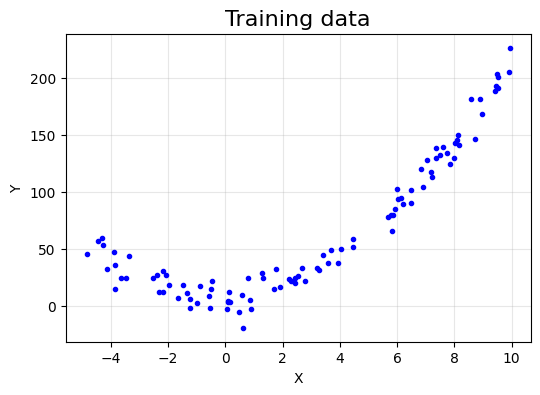

In [ ]:
# Nonlinear Regression
n = 100
x = -5 + 15*np.random.rand(n, 1)
noise = 10*np.random.randn(n, 1)

y = 10 + 1*x + 2*x**2 + noise   # y = w0 + w1*x + w2*x^2 + noise

plt.figure(figsize = (6, 4))
plt.title('Training data', fontsize = 16)
plt.xlabel('X')
plt.ylabel('Y')
#plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.grid(alpha = 0.3)
plt.show()

In [ ]:
A = np.hstack([x**0, x, x**2])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print('omega:\n', w)

omega:
 [[9.3152104 ]
 [0.72090039]
 [2.00612146]]


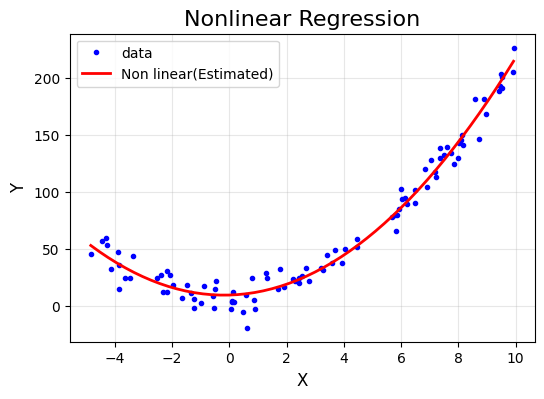

In [ ]:
xp = np.linspace(np.min(x), np.max(x))
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2


plt.figure(figsize = (6, 4))
plt.title('Nonlinear Regression', fontsize = 16)
#plt.plot(x, y, 'o', markersize = 4, alpha = 0.3)
plt.plot(x, y, 'bo', markersize = 3, label = "data")
plt.xlabel('X', fontsize = 12)
plt.ylabel('Y', fontsize = 12)
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Non linear(Estimated)')
plt.legend()
plt.grid(alpha = 0.3)
plt.show()


# Overfitting vs. Underfitting


## Nonlinear Regression with 10 Data Points

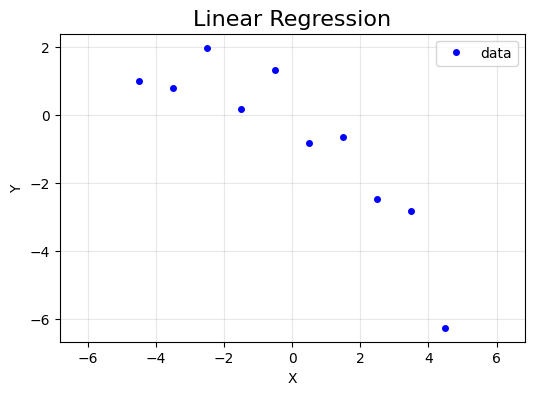

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 10 data points
n = 10
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

plt.figure(figsize = (6, 4))
plt.title('Linear Regression', fontsize = 16)
#plt.plot(x, y, 'o', alpha = 0.5)
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.legend()
plt.xlabel('X')
plt.ylabel('Y')
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()

<br>

__Degree 1 (Linear Regression):__

- The model underfits the data
- It fails to capture the non-linear pattern and results in a straight-line fit.

<br>

In [ ]:
A = np.hstack([x**0, x])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print(w)

[[-0.7774    ]
 [-0.71070424]]


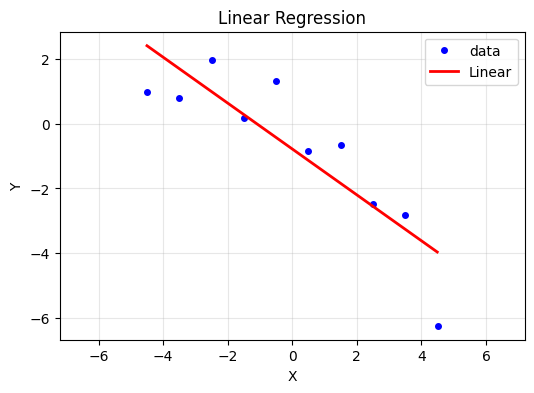

In [ ]:
# to plot
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.plot(xp[:,0], yp[:,0], 'r', linewidth = 2, label = 'Linear')
plt.title('Linear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()


<br>

__Degree 2 (Linear Regression):__

- The model underfits the data
- It fails to capture the non-linear pattern and results in a straight-line fit.

<br>

In [ ]:
A = np.hstack([x**0, x,  x**2])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print(w)

[[ 0.33669062]
 [-0.71070424]
 [-0.13504129]]


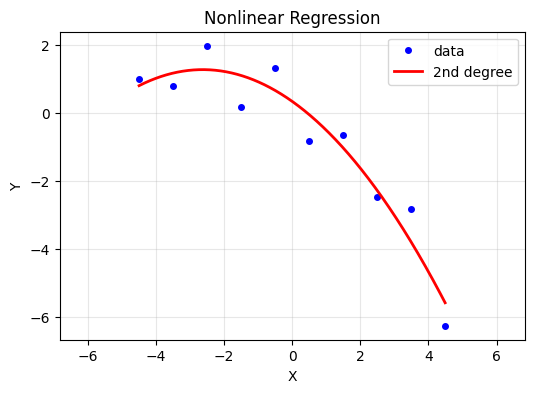

In [ ]:
# to plot
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.plot(xp[:,0], yp[:,0], 'r', linewidth = 2, label = '2nd degree')
plt.title('Nonlinear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()

<br>

__Degree 3 (Cubic Polynomial):__

- The model fits the data well
- It captures the underlying trend without being too flexible or too rigid.

<br>

In [ ]:
A = np.hstack([x**0, x, x**2, x**3])
A = np.asmatrix(A)

w = (A.T*A).I*A.T*y
print(w)

[[ 0.33669062]
 [-0.58052442]
 [-0.13504129]
 [-0.00888599]]


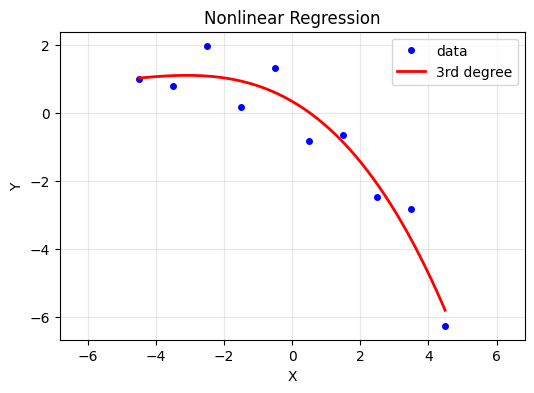

In [ ]:
# to plot
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
yp = w[0,0] + w[1,0]*xp + w[2,0]*xp**2 + w[3,0]*xp**3

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.plot(xp[:,0], yp[:,0], 'r', linewidth = 2, label = '3rd degree')
plt.title('Nonlinear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()

<br>

__Degree 9 (High-Degree Polynomial):__

- The model overfits the data
- It closely follows every data point, including noise, resulting in a wavy curve that fails to generalize well to unseen data.

<br>

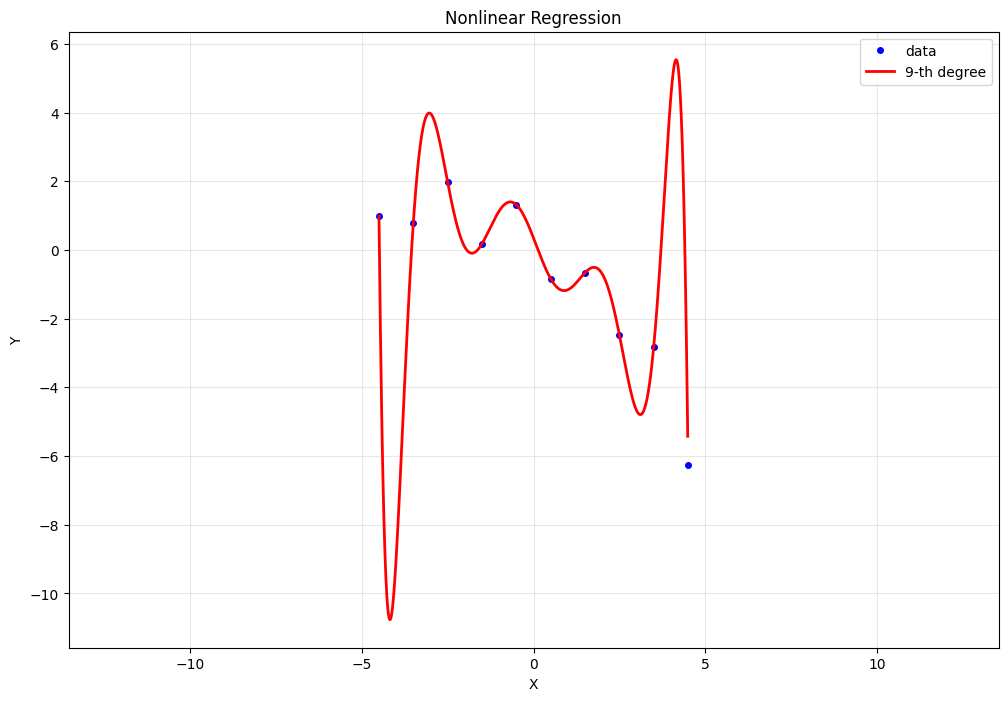

In [ ]:
d = 10   # d = (n-1)-th degree polynomials

# polynomials basis function matrix build-up
xp = np.arange(-4.5, 4.5, 0.01).reshape(-1, 1)
polybasis = np.hstack([xp**i for i in range(d)])
polybasis = np.asmatrix(polybasis)

# w를 구하는 과정
A = np.hstack([x**i for i in range(d)])
A = np.asmatrix(A)
w = (A.T*A).I*A.T*y  # 학습(최소제곱법)

yp = polybasis*w  # polybasis 함수와 w의 선형 결합

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.plot(xp[:,0], yp[:,0], 'r', linewidth = 2, label = '{}-th degree'.format(d-1))
plt.title('Nonlinear Regression')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()

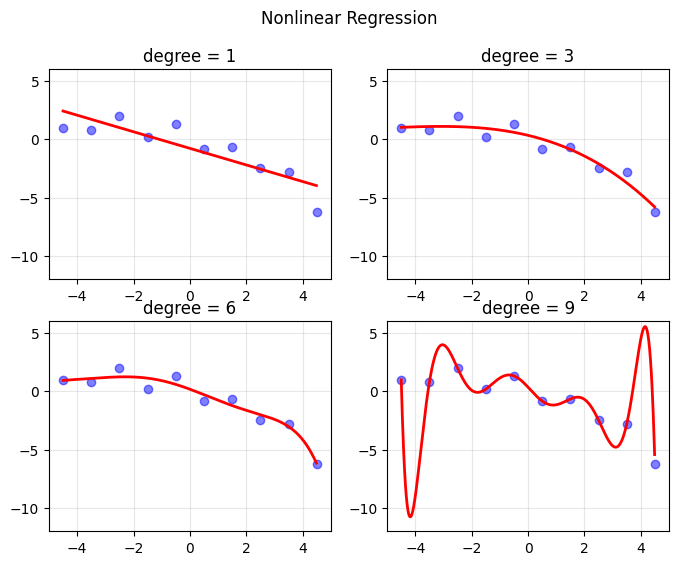

In [ ]:
d = [1, 3, 6, 9]
RSS = []  #  Residual Sum of Squares

plt.figure(figsize = (8, 6))
plt.suptitle('Nonlinear Regression', fontsize = 12)

for k in range(4):

    polybasis = np.hstack([xp**i for i in range(d[k]+1)])  # polynomials basis function matrix build-up
    polybasis = np.asmatrix(polybasis)

    A = np.hstack([x**i for i in range(d[k]+1)]) # w를 구하는 과정
    A = np.asmatrix(A)
    w = (A.T*A).I*A.T*y    # 학습(최소제곱법)

    yp = polybasis*w   # polybasis 함수와 w의 선형 결합

    RSS.append(np.linalg.norm(y - A*w, 2)**2)  # Square of L2 norm

    plt.subplot(2, 2, k+1)
    plt.plot(x, y, 'bo', alpha = 0.5)
    plt.plot(xp, yp, 'r', linewidth = 2)
    plt.axis([-5, 5, -12, 6])
    plt.title('degree = {}'.format(d[k]))
    plt.grid(alpha=0.3)

plt.show()

## Overfitting vs. Underfitting (scikit-learn)

https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html

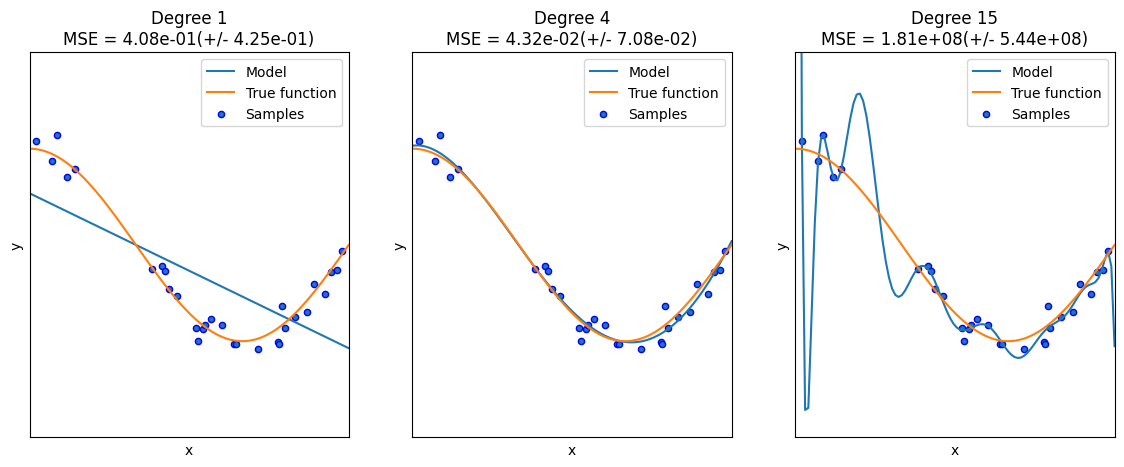

In [ ]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 30
degrees = [1, 4, 15]

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
            degrees[i], -scores.mean(), scores.std()
        )
    )
plt.show()

## Loss : Residual Sum of Squares(RSS), SSE

$$ \sum\limits_{i = 1}^{m} {\lVert\ e_{i} \lVert\ ^2} = \sum\limits_{i = 1}^{m} \left(\hat{y}_{i} - y_{i} \right)^2$$
<br>

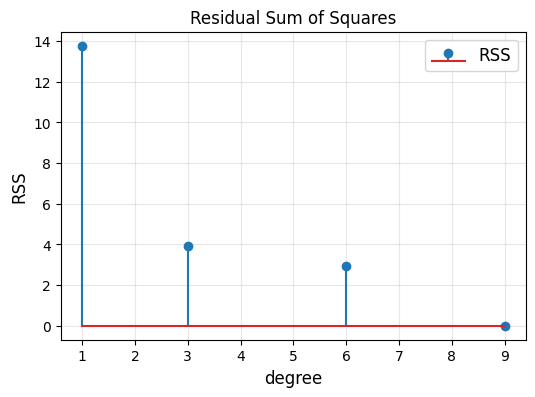

In [ ]:
# Residual Sum of Squares
plt.figure(figsize = (6, 4))
plt.stem(d, RSS, label = 'RSS')
plt.title('Residual Sum of Squares', fontsize = 12)
plt.xlabel('degree', fontsize = 12)
plt.ylabel('RSS', fontsize = 12)
plt.legend(fontsize = 12)
plt.grid(alpha = 0.3)
plt.show()


# 정규화(Regularization) : Overfitting 해결 방안


## L2 regularization (Ridge Regularization or weight decay)
It involves adding a penalty equal to the sum of the squared weights to the loss function.
<br>

- magnitude of coefficients

<br>

$$
\begin{align*}
\text{Total cost } = \;&\underbrace{\text{measure of fit}}_{RSS(\omega)}  + \;\lambda \cdot \underbrace{\text{measure of magnitude of coefficients}}_{\lambda \cdot \lVert \omega \rVert_2^2} \\ \\
\implies &\min\; \lVert \ A \omega - y \rVert_2^2 + \lambda \lVert \omega \rVert_2^2
\end{align*}
$$
<br>
$\quad\;$where $ RSS(\omega) = \lVert \ A\omega - y \rVert^2_2 $, ( = Rresidual Sum of Squares) and $\lambda$ is a tuning parameter to be determined separately

<br>

- the second term, $\lambda \cdot \lVert \omega \rVert_2^2$, called a shrinkage penalty, is small when $\omega_1, \cdots,\omega_d$ are close to zeros, and so it has the effect of shrinking the estimates of $\omega_j$ towards zero


- The tuning parameter $\lambda$ : 개발자가 수정하는 하이퍼 파라미터


- known as a _ridge regression_


<br>

__*  RBF functions__

A Radial Basis Function (RBF) is a type of basis function whose value depends only on the distance between the input and a fixed center point.   It is useful for capturing localized patterns

- Gaussian RBF (most commonly used) with bandwidth $\sigma$ and $k$ RBF centers $\mu_i \in \mathbb{R}^n$

<br>
$$ b_i(x) =  \exp \left( - \frac{\lVert x-\mu_i \rVert^2}{2\sigma^2}\right) $$



__Example__:

$$\min\; \lVert \ A\omega - y \rVert_2^2$$

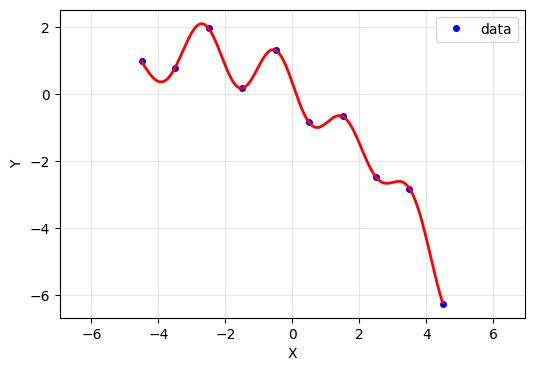

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx

# 10 data points
n = 10
x = np.linspace(-4.5, 4.5, 10).reshape(-1, 1)
y = np.array([0.9819, 0.7973, 1.9737, 0.1838, 1.3180, -0.8361, -0.6591, -2.4701, -2.8122, -6.2512]).reshape(-1, 1)

d = 10
u = np.linspace(-4.5, 4.5, d)

sigma = 1

# RBF basis function matrix build-up
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.asmatrix(rbfbasis)

# w를 구하는 과정
A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
A = np.asmatrix(A)

# CVXPY optimization 학습
w = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A@w - y))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*w.value  # RBF 함수와 w의 선형 결합

plt.figure(figsize = (6, 4))
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.plot(xp, yp, 'r', linewidth = 2)
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis([-5, 5, -12, 6])
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()

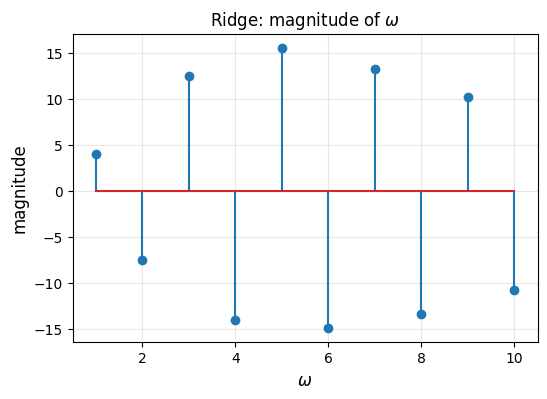

In [ ]:
plt.figure(figsize = (6, 4))
plt.title(r'Ridge: magnitude of $\omega$', fontsize = 12)
plt.xlabel(r'$\omega$', fontsize = 12)
plt.ylabel('magnitude', fontsize = 12)
plt.stem(np.linspace(1, 10, 10).reshape(-1, 1), w.value)
plt.xlim([0.5, 10.5])
# plt.ylim([-5, 5])
plt.grid(alpha = 0.3)
plt.show()

<br>

## Coefficients $\omega$  regularization

<br>

$$\min\; \lVert \ A \omega - y \rVert_2^2 + \lambda \lVert \omega \rVert_2^2$$

<br>

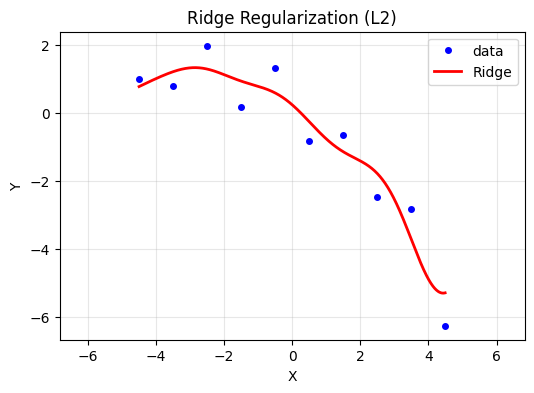

In [ ]:
# ridge regression

lamb = 0.1

w = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A@w - y) + lamb*cvx.sum_squares(w))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*w.value

plt.figure(figsize = (6, 4))
plt.title('Ridge Regularization (L2)', fontsize = 12)
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.plot(xp, yp, 'r', linewidth = 2, label = 'Ridge')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis([-5, 5, -12, 6])
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()

<br>

Plot the values of all the coefficients.

<br>

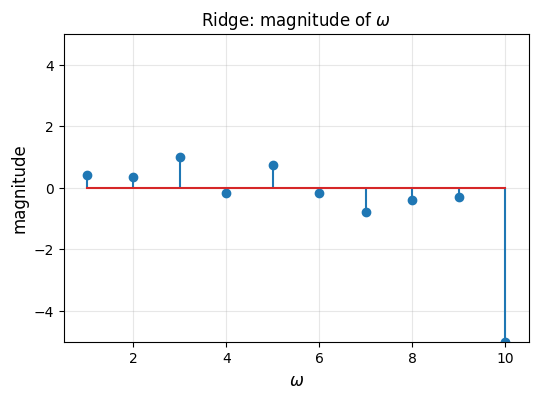

In [ ]:
# Regulization (= ridge nonlinear regression) encourages small weights, but not exactly 0

plt.figure(figsize = (6, 4))
plt.title(r'Ridge: magnitude of $\omega$', fontsize = 12)
plt.xlabel(r'$\omega$', fontsize = 12)
plt.ylabel('magnitude', fontsize = 12)
plt.stem(np.linspace(1, 10, 10).reshape(-1, 1), w.value)
plt.xlim([0.5, 10.5])
plt.ylim([-5, 5])
plt.grid(alpha = 0.3)
plt.show()

## Sparsity for Feature Selection using LASSO

$$
\begin{align*}
\text{Total cost } = \;&\underbrace{\text{measure of fit}}_{RSS(\omega)}  + \;\lambda \cdot \underbrace{\text{measure of magnitude of coefficients}}_{\lambda \cdot \lVert \omega \rVert_1} \\ \\
\implies &\min\; \lVert \ A \omega - y \rVert_2^2 + \lambda \lVert \omega \rVert_1
\end{align*}$$


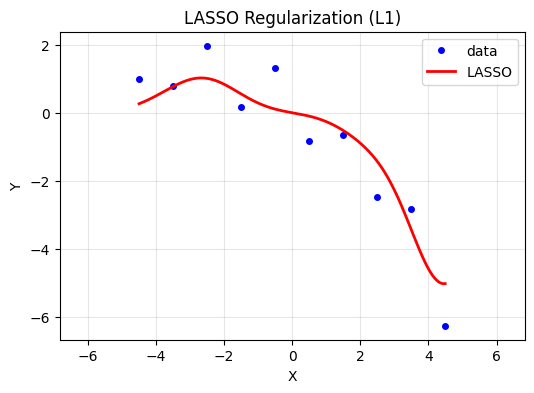

In [ ]:
# LASSO regression

lamb = 2
w = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.sum_squares(A@w - y) + lamb*cvx.norm(w, 1))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*w.value

plt.figure(figsize = (6, 4))
plt.title('LASSO Regularization (L1)', fontsize = 12)
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.plot(xp, yp, 'r', linewidth = 2, label = 'LASSO')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis([-5, 5, -12, 6])
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()

<br>

Plot the values of all the coefficients.

<br>

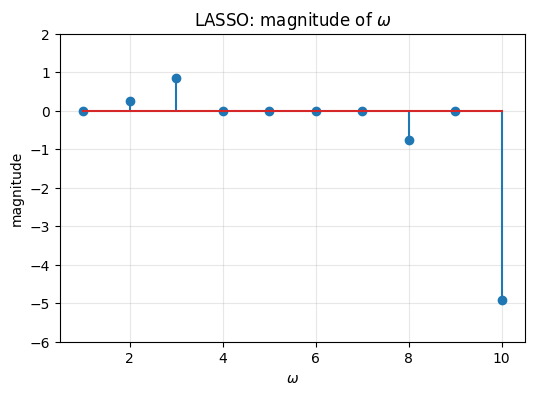

In [ ]:
# Regulization (= Lasso nonlinear regression) encourages zero weights

plt.figure(figsize = (6, 4))
plt.title(r'LASSO: magnitude of $\omega$', fontsize = 12)
plt.xlabel(r'$\omega$')
plt.ylabel('magnitude')
plt.stem(np.arange(1,11), w.value)
plt.xlim([0.5, 10.5])
plt.ylim([-6, 2])
plt.grid(alpha = 0.3)
plt.show()



<br>

__Sparsity and Feature Selection__:

The L1 penalty in LASSO (Least Absolute Shrinkage and Selection Operator) encourages sparsity in the coefficient estimates, meaning it drives some coefficients to be exactly zero. This property is particularly useful for feature selection, as it allows the model to identify and retain only the most relevant predictors, simplifying the model and potentially improving interpretability.

<br>

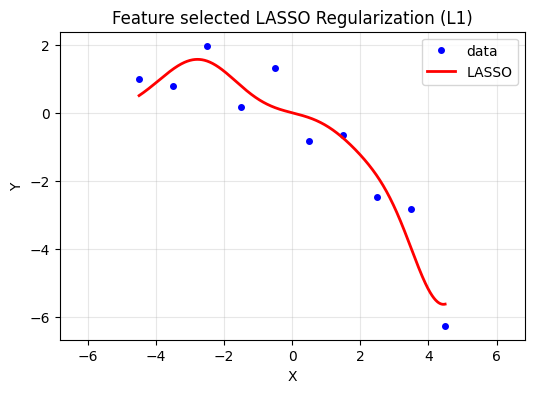

In [ ]:
# reduced order model
# we will use only w2, w3, w8, w10

d = 4
u = np.array([-3.5, -2.5, 2.5, 4.5])

sigma = 1

A = np.hstack([np.exp(-(x-u[i])**2/(2*sigma**2)) for i in range(d)])
rbfbasis = np.hstack([np.exp(-(xp-u[i])**2/(2*sigma**2)) for i in range(d)])

A = np.asmatrix(A)
rbfbasis = np.asmatrix(rbfbasis)

w = cvx.Variable([d, 1])
obj = cvx.Minimize(cvx.norm(A@w - y, 2))
prob = cvx.Problem(obj).solve()

yp = rbfbasis*w.value

plt.figure(figsize = (6, 4))
plt.title('Feature selected LASSO Regularization (L1)', fontsize = 12)
plt.plot(x, y, 'bo', markersize = 4, label = "data")
plt.plot(xp, yp, 'r', linewidth = 2, label = 'LASSO')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.axis([-5, 5, -12, 6])
plt.grid(alpha = 0.3)
plt.axis('equal')
plt.show()